In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pickle
%matplotlib inline

In [2]:

from sklearn.naive_bayes import GaussianNB

In [3]:
filename = 'E:\\glaucoma_final\\finalized_model_brief_svc.sav'
svc = pickle.load(open(filename, 'rb'))

In [4]:
def Single_image_preprocessing(image):
    reshape = cv2.resize(image, (400, 400))
    blue, green, red = cv2.split(reshape)
    equ = cv2.equalizeHist(green)
    return equ, green

In [5]:
def single_brief_feature_extraction(image):
    brief_feature_extracted = []
    image_features = []
    feature_image = np.copy(image)
    brief_features = []
    fast = cv2.FastFeatureDetector_create()
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    keypoints = fast.detect(feature_image, None)
    keypoints_brief, descriptors = brief.compute(feature_image, keypoints)
    brief_features.append(descriptors[0:200])
    brief_features = np.ravel(brief_features)
    image_features.append(brief_features)
    brief_feature_extracted.append(np.concatenate(image_features))
    return brief_feature_extracted

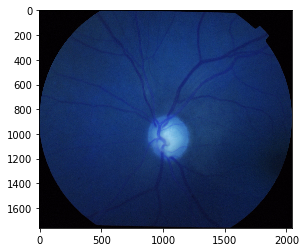

In [6]:
image = cv2.imread('E:\\glaucoma_final\\glaucoma_test\\30.jpg')
plt.imshow(image)

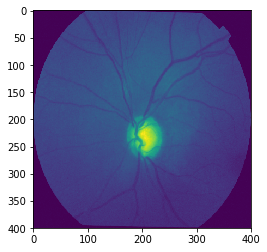

In [7]:
preprocessed_image,green = Single_image_preprocessing(image)
plt.imshow(green)

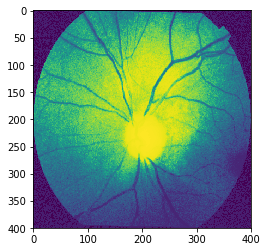

In [8]:
plt.imshow(preprocessed_image)

In [9]:
extracted_feature = single_brief_feature_extraction(preprocessed_image)

In [10]:
y_pred = svc.predict(extracted_feature)
if(y_pred==0):
    print("glaucoma")
else:
    print("healthy")

glaucoma


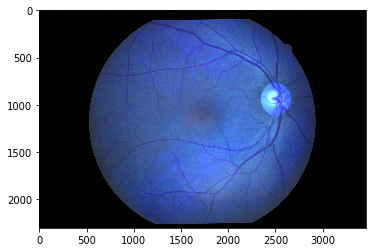

In [11]:
image1 = cv2.imread('E:\\glaucoma_final\\health\\1.jpg')
plt.imshow(image1)

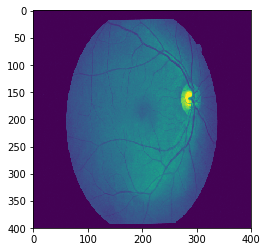

In [12]:
preprocessed_image1,channel = Single_image_preprocessing(image1)
plt.imshow(channel)

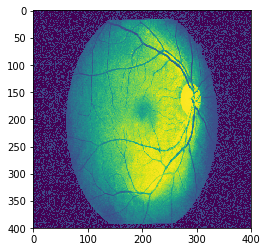

In [13]:
plt.imshow(preprocessed_image1)

In [14]:
extracted_feature1 = single_brief_feature_extraction(preprocessed_image1)

In [15]:
y_pred1 = svc.predict(extracted_feature1)
print(y_pred1)
if(y_pred1==0):
    print("glaucoma")
else:
    print("healthy")

[1.]
healthy
